# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team NM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Team Members
1. Bakwe Chokoe
2. Hlawulekani Rikhotso
3. Tshepiso Ngwato
4. Benson Kamau
5. Nozipho
6. Mutondi Tshivhase
### Predict Overview



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Pre-processing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance</a>

<a href=#ten>10. Model Explanations</a>

<a href=#eleven>11. Conclusion</a>


 <a id="one"></a>
## **1. Introduction**







In [1]:
# Write the introduction

 <a id="one"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Problem Statement ⚡ |
| :--------------------------- |
| In this section you are required to introduce and elaborate on the problem statement or challenge you are required to solve. |


In [2]:
# Discuss the problem statement

 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [4]:
# load the dataframe from the given dataset
df_train =pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\train.csv')
df_genome_tags=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\genome_tags.csv')
df_movies=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\movies.csv')
df_links=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\links.csv')
df_genome_scores=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\genome_scores.csv')
df_tags=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\tags.csv')
df_imdb_data=pd.read_csv\
(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\imdb_data.csv')


<a id="two"></a>
## 5. Pre-processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Viewing the shape of the dataframes

Here we are just having a view of the shape of varoius dataframes in our dataset i.e.
 - df_imdb_data
 - df_genome_tags
 - df_genome_scores
 - df_train
 - df_links
 - df_movies
 - df_tags

In [5]:
# Pre-process the data
df_train.shape

(10000038, 4)

In [6]:
df_genome_tags.shape

(1128, 2)

In [7]:
df_genome_scores.shape

(15584448, 3)

In [8]:
df_tags.shape

(1093360, 4)

In [9]:
df_links.shape

(62423, 3)

In [10]:
df_movies.shape

(62423, 3)

In [11]:
df_imdb_data.shape

(27278, 6)

### Checking for null values in the various dataframes in the given  dataset

Here in this sections we will be checking for `null values ` in the various dataframes in the data set i.e.
 - df_imdb_data
 - df_genome_tags
 - df_genome_scores
 - df_train
 - df_links
 - df_movies
 - df_tags

In [12]:
#checking for null in imdb dataframe
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [13]:
#checking for null in genome tags dataframe
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [14]:
#checking for null in genome score dataframe
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [15]:
#checking for null in train dataframe
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
#checking for null in links dataframe
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [17]:
#checking for null in tags dataframe
df_tags.isnull().sum()


userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [18]:
#checking for null in movies dataframe
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### Viewing content in the tables

In [19]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [20]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [22]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [23]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [24]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [25]:
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [26]:
from datetime import datetime
import re
#function for formating time
def formattime(t):
    time=datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')
    return time
 #function extracting number   
def extract_number(n):
    number = "".join([ch for ch in n if ch.isdigit()])
    return number
 # functon for extracting clean string from our title column   
def extract_string(n):
    brackets=['(',')']
    string = "".join([ch for ch in n if not ch.isdigit() and ch not in brackets])
    return string
 #this function will split the text by |   
def split_text(n):
    text_split = " ".join(n.split("|"))
    return text_split


Applying the fucntions described above to `df_movies['genres'],df_movies['title']` column in order to extract the individual genres,year from title, and title itself without the year 

In [27]:
# splitting genres
df_movies['clean_genres']=df_movies['genres'].apply(split_text)

In [28]:
# extract title and year into their respective indivual column
df_movies['title_year']=df_movies['title'].apply(extract_number)
df_movies['title_string']=df_movies['title'].apply(extract_string)

In [29]:
# formatime time
df_train['f_time']=df_train['timestamp'].apply(formattime)

In [30]:
df_movies.head()

,movieId,title,genres,clean_genres,title_year,title_string
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,Comedy,1995,Father of the Bride Part II


In [31]:
df_tags['f_time_tag']=df_tags['timestamp'].apply(formattime)

In [32]:
# drop null values in tags and links dataframe
df_tags_clean=df_tags.dropna()
df_links_clean=df_links.dropna()

In [33]:
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [34]:
# we will drop the columns with more than 50% null values in the imdb_data dataframe
#here we are checking the number of null values in columns
val=df_imdb_data[df_imdb_data.columns[0]].count()
for col in df_imdb_data.columns:
    na =df_imdb_data[col].isnull().sum()
    per_na=round(na/val*100,2)
    print(f"The percent of null values in {col} is {per_na}")

The percent of null values in movieId is 0.0
The percent of null values in title_cast is 36.91
The percent of null values in director is 36.2
The percent of null values in runtime is 44.32
The percent of null values in budget is 71.02
The percent of null values in plot_keywords is 40.61


In [35]:

df_imdb_data=df_imdb_data.drop('budget', axis=1)

In [36]:
df_imdb_data = df_imdb_data.replace(' ', np.nan)                   # to get rid of empty values
nan_value = df_imdb_data[df_imdb_data.isna().any(axis=1)]         # to get all rows with Na

nan_value.head() 

,movieId,title_cast,director,runtime,plot_keywords
29,30,Li Gong|Baotian Li|Xiaoxiao Wang|Xuejian Li|Ch...,Feiyu Bi,NaN,NaN
76,77,Nico|Tina Aumont|Christian Päffgen|Edith Boulo...,Susanne Ofteringer,NaN,f rated|female musician|singer songwriter|inte...
107,109,Raymond J. Barry|Rustam Branaman|Jennifer MacD...,James Bruce,NaN,topless bar|topless|stripper|jeans
109,111,NaN,NaN,NaN,NaN
117,119,Andy Garcia|Alan Arkin|Rachel Ticotin|Joe Pant...,Andrew Davis,NaN,lawyer|estate|twin brother|brother brother rel...


In [37]:
#df[df.isin(['Rich Burns']).any(axis=1)]

In [38]:

df_imdb=df_imdb_data

#Removing rows with more than 2 null values from our data
max_null_values = 2
rows_to_remove = []
for index, row in df_imdb.iterrows():
    if row.isnull().sum() > max_null_values:
        rows_to_remove.append(index)

#df_cleaned = rows_to_remove #nan_values.drop(rows_to_remove)
df_imdb_clean=df_imdb.drop(rows_to_remove,axis=0)
df_imdb_clean.head()



,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion


In [39]:
# Replace NaN values in 'runtime' with the average runtime for each director
df_imdb_clean['runtime'] = df_imdb_clean.groupby('director')['runtime'].transform(lambda x: x.fillna(x.mean()))
# Replace NaN values in 'title_cast' with the mode for each director
df_imdb_clean['title_cast'] = df_imdb_clean.groupby('director')['title_cast'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
df_imdb_clean

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion
...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,friend|friendship|television show|restaurant


In [40]:
# here we are filling the null values of title cast with director
df_imdb_clean['title_cast'] = df_imdb_clean['title_cast'].fillna(df_imdb_clean['director'])

#here we are filling runtime null values  with  mean runtime for the movies
df_imdb_clean['runtime'] = df_imdb_clean['runtime'].fillna(df_imdb_clean['runtime'].mean())


In [41]:
df_imdb_clean.isnull().sum()

movieId             0
title_cast         32
director           32
runtime             0
plot_keywords    1223
dtype: int64

In [42]:
# drop null values in imdb
df_imdb_clean=df_imdb_clean
df_imdb_clean=df_imdb_clean.dropna(subset=['director'])

In [43]:
df_imdb_clean.isnull().sum()

movieId             0
title_cast          0
director            0
runtime             0
plot_keywords    1222
dtype: int64

In [44]:
df_movies_clean=df_movies
df_movies_clean = df_movies.drop(['genres','title'], axis=1)
df_movies_clean.head()

,movieId,clean_genres,title_year,title_string
0,1,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Adventure Children Fantasy,1995,Jumanji
2,3,Comedy Romance,1995,Grumpier Old Men
3,4,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [45]:
#df_nogenre=df_m.loc[df_m['clean_genres'] == '(no genres listed)']
#df_nogenre
df_movies_clean['clean_genres'] = df_movies_clean['clean_genres'].replace(['(no genres listed)'], 'no_genre')
#df_movies['title_string'] = df_movies.apply(lambda row: '-'.join(row), axis=1)
df_movies_clean.head()


,movieId,clean_genres,title_year,title_string
0,1,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Adventure Children Fantasy,1995,Jumanji
2,3,Comedy Romance,1995,Grumpier Old Men
3,4,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [46]:
# Define a function to extract the year
def extract_year(number):
    number_str = str(number)
    year_str = number_str[-4:]
    return year_str


In [47]:
# Apply the function to the 'number_column' and create a new column 'extracted_year'
df_movies_clean['title_year'] = df_movies_clean['title_year'].apply(extract_year)

In [48]:
#CONVERTING THE datatype to int
df_movies_clean['title_year'] = pd.to_numeric(df_movies_clean['title_year'], errors='coerce')

In [49]:
# Select rows from df1 based on conditions in df2
#selected_rows = df_movies[df_movies['movieId'].isin(rows_with_null_plot_keyword['movieId'])]
#selected_rows

In [50]:
#working on datetime 
df_tags['f_time_tag'] = pd.to_datetime(df_tags['f_time_tag'])

# Split into year, month, and day columns
df_tags['tag_year'] = df_tags['f_time_tag'].dt.year
df_tags['tag_month'] = df_tags['f_time_tag'].dt.month
df_tags['tag_day'] = df_tags['f_time_tag'].dt.day


In [51]:
df_tags_clean = df_tags.drop(['timestamp','f_time_tag'],axis = 1)

In [52]:
df_tags_clean.head()

,userId,movieId,tag,tag_year,tag_month,tag_day
0,3,260,classic,2015,8,13
1,3,260,sci-fi,2015,8,13
2,4,1732,dark comedy,2019,11,16
3,4,1732,great dialogue,2019,11,16
4,4,7569,so bad it's good,2019,11,16


In [53]:
#df_train.head()
#working on datetime 
df_train['f_time'] = pd.to_datetime(df_train['f_time'])

# Split into year, month, and day columns
df_train['train_year'] = df_train['f_time'].dt.year
df_train['train_month'] = df_train['f_time'].dt.month
df_train['train_day'] = df_train['f_time'].dt.day

In [54]:
df_train_clean=df_train.drop(['timestamp','f_time'],axis = 1)
df_train_clean.head()

,userId,movieId,rating,train_year,train_month,train_day
0,5163,57669,4.0,2018,2,11
1,106343,5,4.5,2008,3,23
2,146790,5459,5.0,2004,2,8
3,106362,32296,2.0,2015,2,4
4,9041,366,3.0,1996,5,29


In [55]:
df_genome_tags.head()


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [56]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [57]:
# merging genome tags and genome scores frames for training 
df_merge_genome=pd.merge(df_genome_tags, df_genome_scores, on='tagId', how='inner')
df_merge_genome=df_merge_genome.sample(n=200000)
df_merge_genome.head()

,tagId,tag,movieId,relevance
9733597,705,new york city,8924,0.26475
12100749,876,sarcasm,111251,0.11600
6787448,492,harry potter,4223,0.00825
6284225,455,goofy,111443,0.20600
5959095,432,george orwell,4876,0.06025


In [58]:
#merging movies and links data
df_merge_movie_links=pd.merge(df_links_clean, df_movies_clean, on='movieId', how='inner')
df_merge_movie_links.head()

,movieId,imdbId,tmdbId,clean_genres,title_year,title_string
0,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story
1,2,113497,8844.0,Adventure Children Fantasy,1995.0,Jumanji
2,3,113228,15602.0,Comedy Romance,1995.0,Grumpier Old Men
3,4,114885,31357.0,Comedy Drama Romance,1995.0,Waiting to Exhale
4,5,113041,11862.0,Comedy,1995.0,Father of the Bride Part II


In [59]:
#merging movies and links and genome
df_merge_movie_links_genome=pd.merge(df_merge_movie_links, df_merge_genome, on='movieId', how='inner')
df_merge_movie_links_genome.head()

,movieId,imdbId,tmdbId,clean_genres,title_year,title_string,tagId,tag,relevance
0,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,548,inspirational,0.34850
1,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,920,silly fun,0.18375
2,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,424,gangsters,0.18450
3,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,534,imaginary friend,0.04925
4,1,114709,862.0,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,277,culture clash,0.44300


In [60]:
df_train_clean1=df_train_clean
df_tags_clean1=df_tags_clean
df_tags_clean1.head()


,userId,movieId,tag,tag_year,tag_month,tag_day
0,3,260,classic,2015,8,13
1,3,260,sci-fi,2015,8,13
2,4,1732,dark comedy,2019,11,16
3,4,1732,great dialogue,2019,11,16
4,4,7569,so bad it's good,2019,11,16


In [61]:
#merging movies and links and genome
df_merge_train_tag=pd.merge(df_train_clean1, df_tags_clean1, on=['movieId','userId'], how='inner')
df_merge_train_tag.head()

,userId,movieId,rating,train_year,train_month,train_day,tag,tag_year,tag_month,tag_day
0,78280,158966,4.5,2017,5,28,coming of age,2019,6,1
1,78280,158966,4.5,2017,5,28,creative,2019,6,1
2,78280,158966,4.5,2017,5,28,freedom,2019,6,1
3,78280,158966,4.5,2017,5,28,funeral,2019,6,1
4,78280,158966,4.5,2017,5,28,good writing,2019,6,1


In [62]:
df_imdb_clean1=df_imdb_clean
df_imdb_clean1=df_imdb_clean1.drop('plot_keywords',axis = 1)
df_imdb_clean1.head()

,movieId,title_cast,director,runtime
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0


In [63]:
# Splitting the title_cast column and creating pairs
df_imdb_clean1['cast_pairs'] = df_imdb_clean1['title_cast'].apply(lambda x: ','.join(sorted(x.split('|'))))
#df_imdb_clean1['cast_pairs'] = df_imdb_clean1['title_cast'].apply(lambda x: '-'.join(sorted(x.split(' '))))
df_imdb_clean1.head()

,movieId,title_cast,director,runtime,cast_pairs
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"Annie Potts,Don Rickles,Erik von Detten,Jack A..."
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"Adam Hann-Byrd,Bebe Neuwirth,Bonnie Hunt,Bradl..."
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"Allison Levine,Ann Morgan Guilbert,Ann-Margret..."
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"Angela Bassett,Brandon Hammond,Dennis Haysbert..."
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"April Ortiz,BD Wong,Diane Keaton,Dulcy Rogers,..."


In [64]:
# Joining the names in the 'cast_pairs' column by hyphen
df_imdb_clean1['cast_pairs_hyphen'] = df_imdb_clean1['cast_pairs'].apply(lambda x: '-'.join(sorted(x.split(' '))))
df_imdb_clean1=df_imdb_clean1.drop(['title_cast','cast_pairs'], axis = 1)
df_imdb_clean1.head()

,movieId,director,runtime,cast_pairs_hyphen
0,1,John Lasseter,81.0,"Allen,Tom-Angel,Jim-Annie-Aste,Tim-Detten,Jack..."
1,2,Jonathan Hensleigh,104.0,"Adam-Alan-Barber,James-Bell-Bundy,Patricia-Cla..."
2,3,Mark Steven Johnson,101.0,"A.-Allison-Andelin,Katie-Evenson-Guilbert,Ann-..."
3,4,Terry McMillan,124.0,"Angela-Bassett,Brandon-Beach,Mykelti-D.-Devine..."
4,5,Albert Hackett,106.0,"Adams,Kate-Anthony,Kieran-April-Chambers,Steve..."


In [65]:
#merging train tag  and clean
df_merge_train_tag_imdb=pd.merge(df_merge_train_tag, df_imdb_clean1, on=['movieId'], how='inner')
df_merge_train_tag_imdb.head()

,userId,movieId,rating,train_year,train_month,train_day,tag,tag_year,tag_month,tag_day,director,runtime,cast_pairs_hyphen
0,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,Thomas Guard,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro..."
1,105728,65882,3.0,2017,3,9,Twist Ending,2017,3,9,Thomas Guard,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro..."
2,112772,65882,3.0,2009,12,23,psychological,2009,12,23,Thomas Guard,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro..."
3,112772,65882,3.0,2009,12,23,Twist Ending,2009,12,23,Thomas Guard,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro..."
4,38451,65882,3.5,2018,6,7,orphan,2018,6,7,Thomas Guard,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro..."


In [66]:
#merging train tag  and cleanimdb, movies,links,
df_merge_all=pd.merge(df_merge_train_tag_imdb, df_merge_movie_links_genome, on=['movieId'], how='inner')
df_merge_all.head()

,userId,movieId,rating,train_year,train_month,train_day,tag_x,tag_year,tag_month,tag_day,...,runtime,cast_pairs_hyphen,imdbId,tmdbId,clean_genres,title_year,title_string,tagId,tag_y,relevance
0,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",588,kids,0.04400
1,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",693,native americans,0.01075
2,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",79,artistic,0.06325
3,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",72,argentina,0.02175
4,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",743,original plot,0.25100


In [67]:
df_merge_all.isnull().sum()

userId                0
movieId               0
rating                0
train_year            0
train_month           0
train_day             0
tag_x                14
tag_year              0
tag_month             0
tag_day               0
director              0
runtime               0
cast_pairs_hyphen     0
imdbId                0
tmdbId                0
clean_genres          0
title_year            0
title_string          0
tagId                 0
tag_y                 0
relevance             0
dtype: int64

In [68]:
#performing natural languange processing for title string to create plot keywords for the null values 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

<a id="three"></a>
## 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
 ⚡ Description: Exploratory data analysis ⚡ 

This is section where we will investigate data in details on all merged dataframes. here we will work with `df_merge_all` dataframe  


In [69]:
df_merge_all.head()

,userId,movieId,rating,train_year,train_month,train_day,tag_x,tag_year,tag_month,tag_day,...,runtime,cast_pairs_hyphen,imdbId,tmdbId,clean_genres,title_year,title_string,tagId,tag_y,relevance
0,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",588,kids,0.04400
1,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",693,native americans,0.01075
2,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",79,artistic,0.06325
3,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",72,argentina,0.02175
4,105728,65882,3.0,2017,3,9,Emily Browning,2017,3,9,...,87.0,"Alf-Banks,Emily-Bristol,David-Bristol,Maya-Bro...",815245,14254.0,Drama Horror Mystery Thriller,2009.0,"Uninvited, The",743,original plot,0.25100


###  Non graphical Statistics 

In [70]:
# look at data statistics

df_rating_mean=df_merge_all.rating.mean()
df_rating_mean

3.8316765107224993

In [71]:
# avg runtime
df_runtime_mean=df_merge_all.runtime.mean()
df_runtime_mean

116.77527110799866

In [72]:
# avg relevance
df_relevance_mean=df_merge_all.relevance.mean()
df_relevance_mean

0.14909317916390402

### Graphical  Exploratory Data Analysis 

In [73]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter

(-0.5, 799.5, 399.5, -0.5)

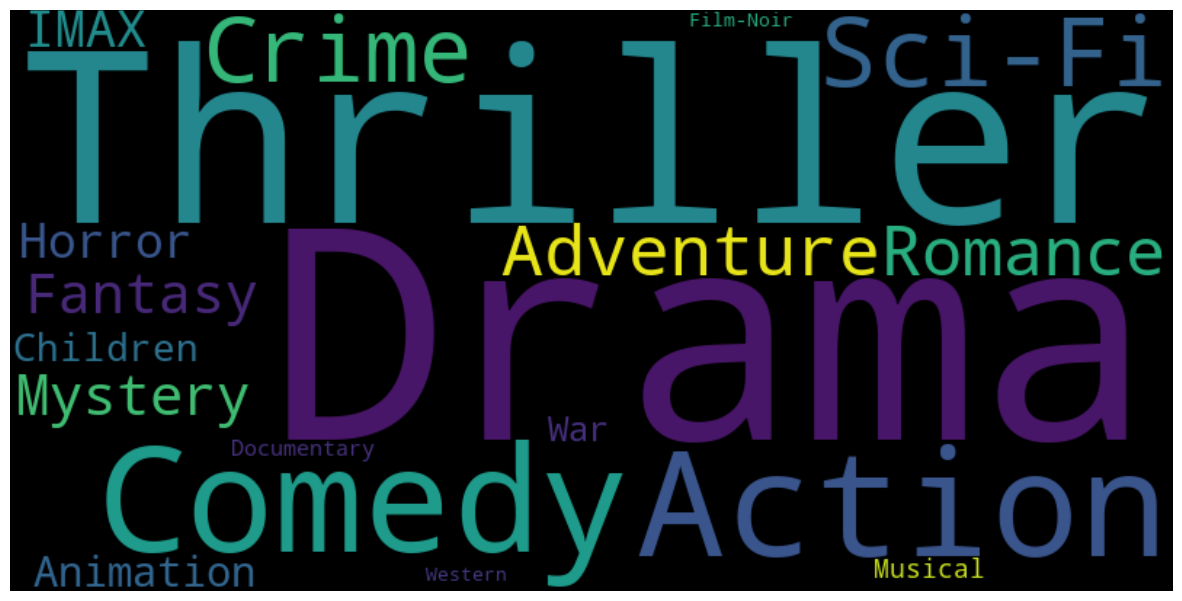

In [74]:
# plot relevant feature interactions
words = []
for i in df_merge_all.clean_genres:
    words.extend(word_tokenize(i))
    
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequencies = Counter(words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

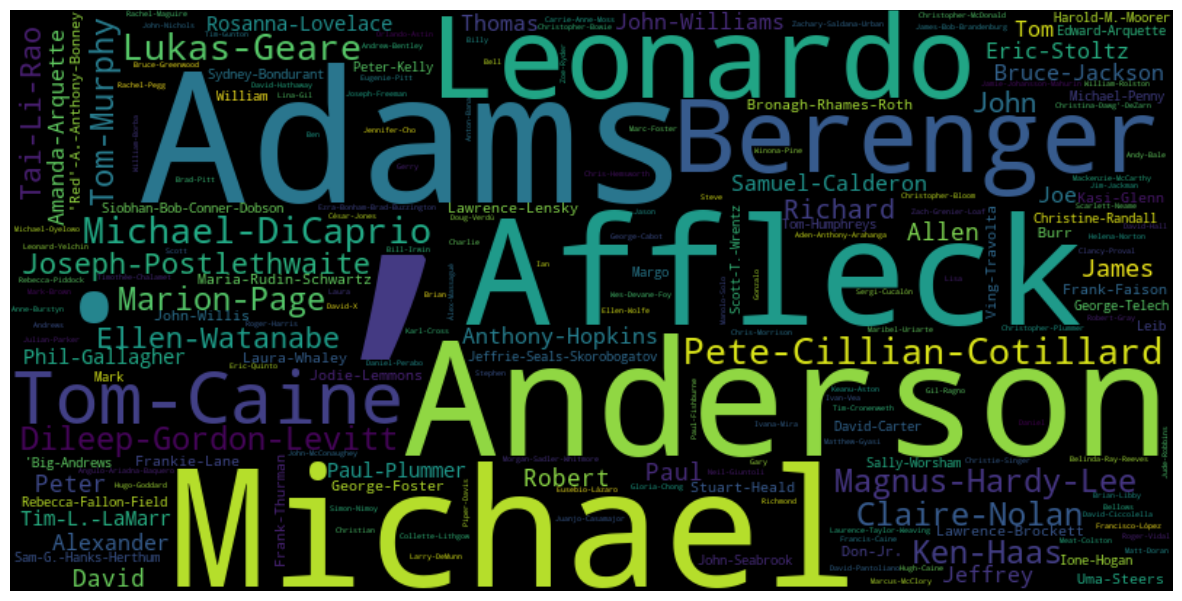

In [75]:
# plot relevant feature interactions
words = []
for i in df_merge_all.cast_pairs_hyphen:
    words.extend(word_tokenize(i))
    
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequencies = Counter(words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Here we will look at the distribution of the features in out data set

In [76]:
#import plotly.graph_objects as go

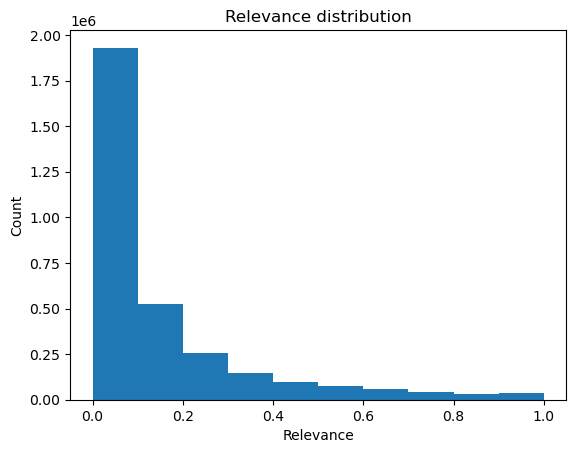

In [77]:
# have a look at feature distributions
# Create a histogram
#fig = px.histogram(df_merge_all.relevance, x="relevance",
                  #title="Relevance distribution")
#fig.show()

plt.hist(df_merge_all.relevance, bins=10)
# Adding a title and labels to the histogram
plt.title("Relevance distribution")
plt.xlabel("Relevance")
plt.ylabel("Count")
# Showing the histogram
plt.show()

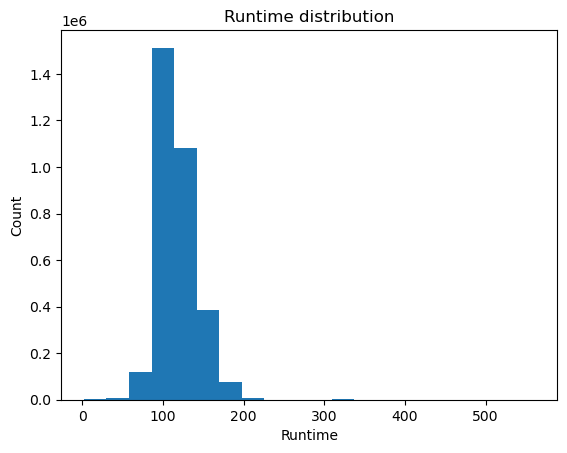

In [78]:
#fig = go.Figure(data=[go.Histogram(x=df_merge_all['runtime'])])
# have a look at feature distributions
# Create a histogram
#fig = px.histogram(df_merge_all.runtime, x="runtime",title="Runtime distribution")
#fig.show()

plt.hist(df_merge_all.runtime, bins=20)
# Adding a title and labels to the histogram
plt.title("Runtime distribution")
plt.xlabel("Runtime")
plt.ylabel("Count")
# Showing the histogram
plt.show()

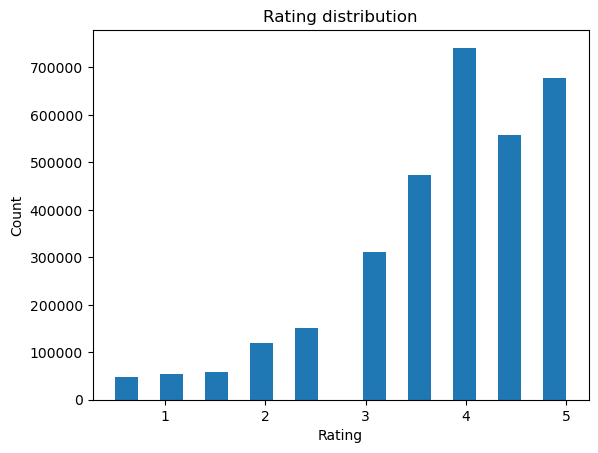

In [79]:
#fig = go.Figure(data=[go.Histogram(x=df_merge_all['rating'])])
# have a look at feature distributions
# Create a histogram
#fig = px.histogram(df_merge_all.rating, x="rating",title="Rating distribution")
#fig.show()
plt.hist(df_merge_all.rating, bins=20)
# Adding a title and labels to the histogram
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
# Showing the histogram
plt.show()


<a id="four"></a>
## 7. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

    
 ⚡ Description: Data engineering ⚡ 
 
Here we will be creating new features engineered from the already existing features

In [80]:
# remove missing values/ features

In [81]:
# create new features

In [82]:
# engineer existing features

<a id="five"></a>
## 8. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [83]:
# split data

In [84]:
# create targets and features dataset

In [85]:
# create one or more ML models

In [86]:
# evaluate one or more ML models

<a id="six"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [87]:
# Compare model performance

In [88]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [89]:
# discuss chosen methods logic

<a id="seven"></a>
## 11. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Conclusion ⚡ |
| :--------------------------- |
| In this section, you are required to conclude your findings and the project as a whole. |

---

In [90]:
# Conclusion